# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [7]:
# Code Here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.model_selection import train_test_split


penguins = load_penguins()
penguins_clean = penguins.dropna()

In [4]:
penguins_dummified = pd.get_dummies(penguins_clean, columns=['species', 'island', 'sex'])
penguins_dummified.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [13]:
# Code Here: Create 4 Models

#Model 1: X's: All predictors included (9)
y = penguins_dummified['bill_depth_mm']
X_1 = penguins_dummified[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap',
                   'species_Gentoo', 'island_Biscoe', 'island_Dream', 'sex_male', 'year']]

lr_1 = LinearRegression()

X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y, test_size=0.25, random_state = 1)
lr_1.fit(X1_train, y1_train)

y_pred_lr_1_train = lr_1.predict(X1_train)
y_pred_lr_1_test = lr_1.predict(X1_test)


#Model 2: X's: Continuous Numerical predictors only (3)
y = penguins_dummified['bill_depth_mm']
X_2 = penguins_dummified[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']] 

lr_2 = LinearRegression()

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y, test_size=0.25, random_state = 1)
lr_2.fit(X2_train, y2_train)

y_pred_lr_2_train = lr_2.predict(X2_train)
y_pred_lr_2_test = lr_2.predict(X2_test)


#Model 3: X's: Categorical predictors only: Island, Species, Sex (3 reference categories) (5)
y = penguins_dummified['bill_depth_mm']
X_3 = penguins_dummified[['species_Chinstrap', 'species_Gentoo', 'island_Biscoe','island_Dream','sex_male']]

lr_3 = LinearRegression()

X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y, test_size=0.25, random_state = 1)
lr_3.fit(X3_train, y3_train)

y_pred_lr_3_train = lr_3.predict(X3_train)
y_pred_lr_3_test = lr_3.predict(X3_test)


#Model 4: X's: numerical predictors & gender (4)
y = penguins_dummified['bill_depth_mm']
X_4 = penguins_dummified[['bill_length_mm', 'flipper_length_mm', 'body_mass_g','sex_male']]

lr_4 = LinearRegression()

X4_train, X4_test, y4_train, y4_test = train_test_split(X_4, y, test_size=0.25, random_state = 1)
lr_4.fit(X4_train, y4_train)

y_pred_lr_4_train = lr_4.predict(X4_train)
y_pred_lr_4_test = lr_4.predict(X4_test)


In [15]:
# MSE for each

mse_train_1 = ('Model 1 Training Error - ', mean_squared_error(y1_train, y_pred_lr_1_train))
mse_test_1  = ('Model 1 Test Error     - ', mean_squared_error(y1_test, y_pred_lr_1_test))

mse_train_2 = ('Model 2 Training Error - ', mean_squared_error(y2_train, y_pred_lr_2_train))
mse_test_2 = ('Model 2 Test Error     - ', mean_squared_error(y2_test, y_pred_lr_2_test))

mse_train_3 = ('Model 3 Training Error - ', mean_squared_error(y3_train, y_pred_lr_3_train))
mse_test_3  = ('Model 3 Test Error     - ', mean_squared_error(y3_test, y_pred_lr_3_test))

mse_train_4 = ('Model 4 Training Error - ', mean_squared_error(y4_train, y_pred_lr_4_train))
mse_test_4 = ('Model 4 Test Error     - ', mean_squared_error(y4_test, y_pred_lr_4_test))



##### Resources:

- [matplotlib plotting circle's connected with line](https://www.mathworks.com/matlabcentral/answers/141965-how-do-i-connect-points-in-a-scatter-plot-with-a-line)

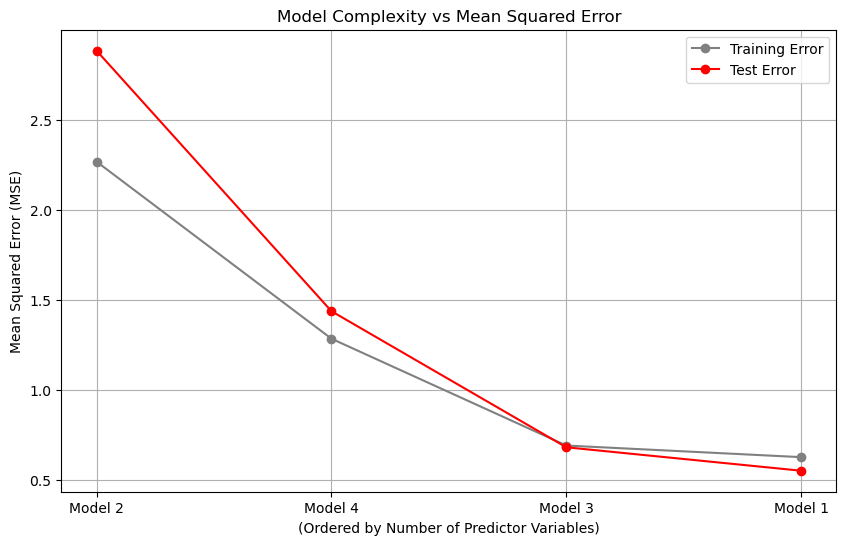

In [26]:
# Create Flexibility/Complexity (Number of Predictors) vs MSE Graph

# Define the model order based on predictor variables and corresponding MSE values for training and test sets in the order requested
model_order = ['Model 2', 'Model 4', 'Model 3', 'Model 1']

# Extracting the MSE values from the tuples to be graphed
mse_trains = [mse_train_1[1], mse_train_2[1], mse_train_3[1], mse_train_4[1]]
mse_tests = [mse_test_1[1], mse_test_2[1], mse_test_3[1], mse_test_4[1]]


# Reorder the MSE values according to match model_order (2, 4, 3, 1)
mse_train_ordered = [mse_trains [i] for i in [1, 3, 2, 0]]  
mse_test_ordered = [mse_tests[i] for i in [1, 3, 2, 0]]  

# Create plot with 
plt.figure(figsize=(10, 6))
plt.plot(model_order, mse_train_ordered,'o-' , color='gray', label='Training Error')
plt.plot(model_order, mse_test_ordered, 'o-', color='red', label='Test Error')
plt.title('Model Complexity vs Mean Squared Error')
plt.xlabel('(Ordered by Number of Predictor Variables)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


### Results


Based on our graph of training and testing errors for each of the 4 Model's, we can see that Model 3 is likely the best model.  Model 2 only contained the lest amount of predictor variables in 3, causing it to perfrom poorly on the test data, and is likely underfitting our data. Model 4 included 4 variables, which showed to reduce the test error but still result in a worse performance than in training. Model 3 was trained with 5 explantory variables in which I selected only the categorical predictors.  This model showed a seemingly equal MSE or error for training and test data, which is a sign that our model can be effective on unseen data, while only including the neccessary variables without overfitting. One may think that Model 1 is the best based on the graph, however Model 1 included 9 predictor variables, which is likely the cause of it performing better on the test data than training data.  This is a clear sign of overfitting as our training error surpasses the test error when predicting with every variable in the set.

**With that said, Model 3 is the optimal model as it does not show signs of over of under fitting and performs equally well on our test data as the data it was trained on.**